Description:

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

In their first Kaggle competition, Rossmann is challenging you to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams! 




Evaluation:

Submissions are evaluated on the Root Mean Square Percentage Error (RMSPE).


Dataset Description:

You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

Files:

train.csv - historical data including Sales

sample_submission.csv - a sample submission file in the correct format

store.csv - supplemental information about the stores

Data fields:

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

Id - an Id that represents a (Store, Date) duple within the test set

Store - a unique Id for each store

Sales - the turnover for any given day (this is what you are predicting)

Customers - the number of customers on a given day

Open - an indicator for whether the store was open: 0 = closed, 1 = open

StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools

StoreType - differentiates between 4 different store models: a, b, c, d

Assortment - describes an assortment level: a = basic, b = extra, c = extended

CompetitionDistance - distance in meters to the nearest competitor store

CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened

Promo - indicates whether a store is running a promo on that day

Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating

Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2

PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

Business Problem:

Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.

Approach

1. Business Problem
2. Data Collection and Preprocessing - Importing important libraries and modules - Data Cleaning - Missing Data Handling - Merging the Datasets
3. Exploratory Data Analysis - Hypotheses - Categorical Features - Continuous Features - EDA Conclusion and Validating Hypotheses
4. Feature Selection and Outlier Detection - Feature Engineering - Outlier Detection and Treatment
5. Modeling - Train Test Split - Baseline Model - Decision Tree - Random Forest Model - Random Forest Hyperparameter Tuning - Random Forest Feature Importance

In [105]:
#Importing important libraries and modules
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})
from datetime import datetime

Data Collection and Preprocessing

In [106]:
#reading the csv file
sales_df = pd.read_csv(r"C:\Users\User12fy\Desktop\Capstone\Capstone-Project\Data\train.csv", parse_dates=['Date'])
stores_df = pd.read_csv(r"C:\Users\User12fy\Desktop\Capstone\Capstone-Project\Data\store.csv")

In [8]:
sales_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
stores_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [13]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [12]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Missing Data Handling

In [14]:
sales_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
stores_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

Text(0.5, 0, 'Competition Distance Distribution Plot')

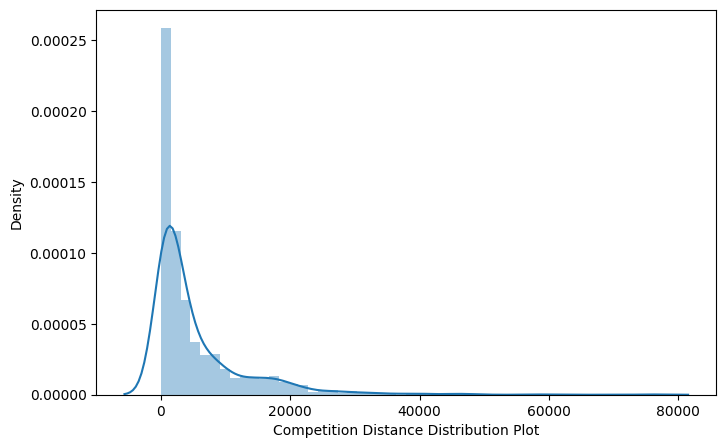

In [16]:
sns.distplot(x=stores_df['CompetitionDistance'], hist = True)
plt.xlabel('Competition Distance Distribution Plot')

It seems like most of the values of the CompetitionDistance are towards the left and the distribution is skewed on the right. Median is more robust to outlier effect.

In [17]:
# filling competition distance with the median value
stores_df['CompetitionDistance'].fillna(stores_df['CompetitionDistance'].median(), inplace = True)

In [18]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
stores_df['CompetitionOpenSinceMonth'].fillna(stores_df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores_df['CompetitionOpenSinceYear'].fillna(stores_df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [19]:
# imputing the nan values of promo2 related columns with 0
stores_df['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_df['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_df['PromoInterval'].fillna(value=0,inplace=True)

Merging the two Datasets

In [20]:
df = sales_df.merge(right=stores_df, on="Store", how="left")

In [21]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [22]:
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval]
Index: []


In [24]:
df.shape

(1017209, 18)

Unique Values in Categorical Features

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [28]:
def summarize_dataframe(pm0):
    
    # Summary of missing values and data types
    summary = pd.DataFrame({
        'Missing Values': pm0.isnull().sum(),
        'Missing Percentage': (pm0.isnull().sum() / len(pm0)) * 100,
        'Data Types': pm0.dtypes.astype(str),
        'Unique Counts': pm0.nunique()
    })
    summary.reset_index(inplace=True)

    
    description = pm0.describe(include='all').T.reset_index()

    df_profile = pd.merge(left=description, right=summary, on='index', how='left')

    # Display the combined profile
    return df_profile

df_summary = summarize_dataframe(df)

In [29]:
df_summary

,index,count,unique,top,freq,mean,min,25%,50%,75%,max,std,Missing Values,Missing Percentage,Data Types,Unique Counts
0,Store,1017209.0,NaN,NaN,NaN,558.429727,1.0,280.0,558.0,838.0,1115.0,321.908651,0,0.0,int64,1115
1,DayOfWeek,1017209.0,NaN,NaN,NaN,3.998341,1.0,2.0,4.0,6.0,7.0,1.997391,0,0.0,int64,7
2,Date,1017209,NaN,NaN,NaN,2014-04-11 01:30:42.846061824,2013-01-01 00:00:00,2013-08-17 00:00:00,2014-04-02 00:00:00,2014-12-12 00:00:00,2015-07-31 00:00:00,NaN,0,0.0,datetime64[ns],942
3,Sales,1017209.0,NaN,NaN,NaN,5773.818972,0.0,3727.0,5744.0,7856.0,41551.0,3849.926175,0,0.0,int64,21734
4,Customers,1017209.0,NaN,NaN,NaN,633.145946,0.0,405.0,609.0,837.0,7388.0,464.411734,0,0.0,int64,4086
5,Open,1017209.0,NaN,NaN,NaN,0.830107,0.0,1.0,1.0,1.0,1.0,0.375539,0,0.0,int64,2
6,Promo,1017209.0,NaN,NaN,NaN,0.381515,0.0,0.0,0.0,1.0,1.0,0.485759,0,0.0,int64,2
7,StateHoliday,1017209,5,0,855087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,object,5
8,SchoolHoliday,1017209.0,NaN,NaN,NaN,0.178647,0.0,0.0,0.0,0.0,1.0,0.383056,0,0.0,int64,2
9,StoreType,1017209,4,a,551627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,object,4


In [30]:
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [31]:
for col in categorical_variables:
  print(f'Unique values for {col}: {df[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [32]:
#change into int type
df['StateHoliday'].replace({'0':0}, inplace=True)

Extracting from the Date

In [40]:
#creating features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()
     

In [37]:
df.shape

(1017209, 22)

In [39]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,212
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,212


Exploratory Data Analysis

Hypotheses:

1. There's a feature called "DayOfWeek" with the values 1-7 denoting each day of the week. There's a week off probably Sunday when the stores would be closed and we would get low overall sales.
2. Customers have a positive correlation with Sales.
3. Different store types (StoreType) exhibit different average sales patterns.
4. Promotion have a positive correlation with Sales.
5. Some stores are closed due to refurbishment, those generate 0 revenue for that time period.
6. Stores are influenced by seasonality, probably before holidays sales is high.
7. Stores located closer to their nearest competitor (lower CompetitionDistance) will have lower sales compared to stores located further away.
8. Stores with an extended assortment (Assortment = 'c') have higher average sales compared to those with a basic (Assortment = 'a') or extra (Assortment = 'b') assortment.
9.  Sales are significantly lower on state holidays (StateHoliday) compared to regular days.
10. Stores participating in continuous promotions (Promo2) have higher average sales compared to those not participating.
11. Sales are significantly different on days affected by school holidays (SchoolHoliday) compared to regular school days.
12. Different store types exhibit different number of customers. 

Categorical Features:

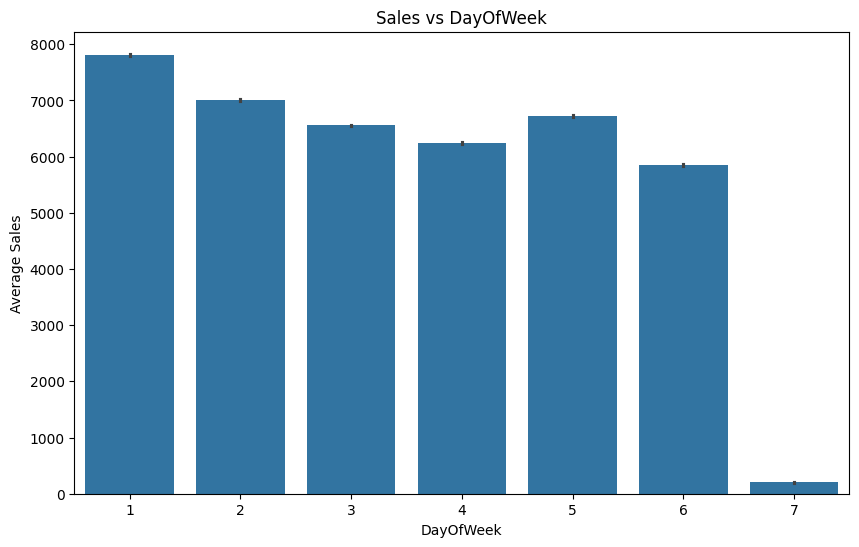

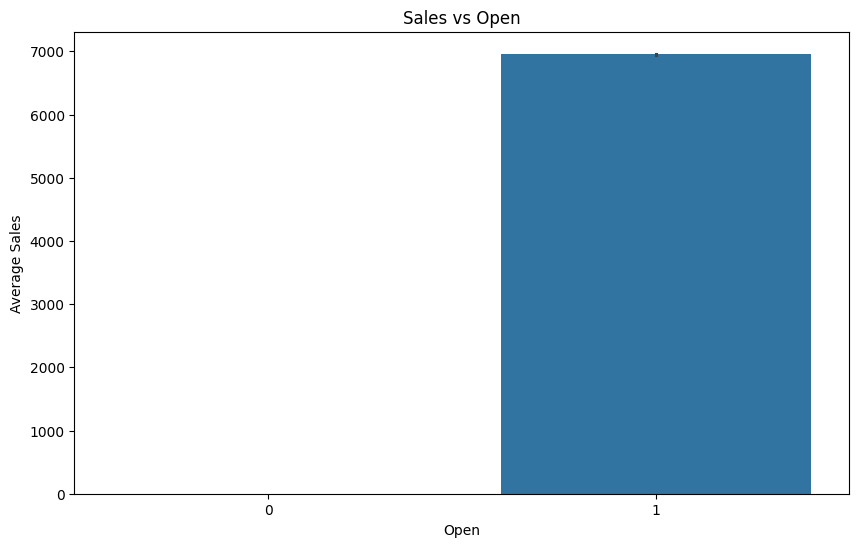

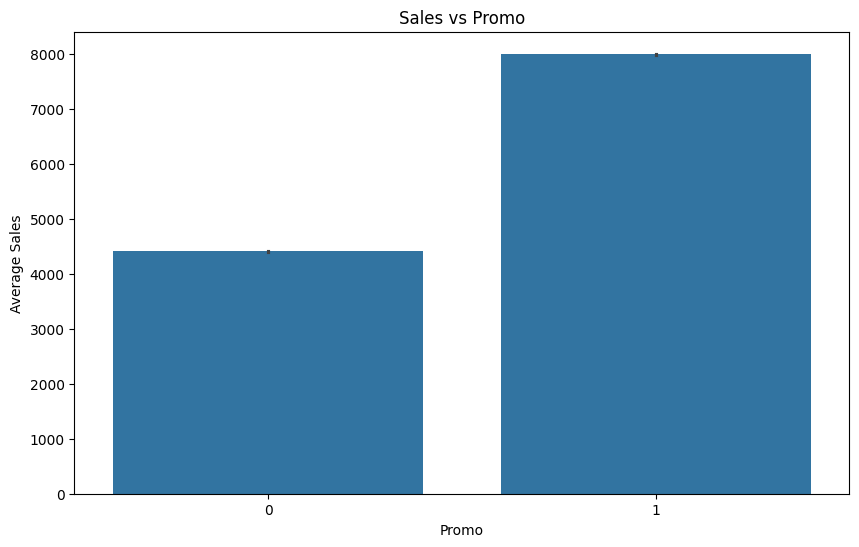

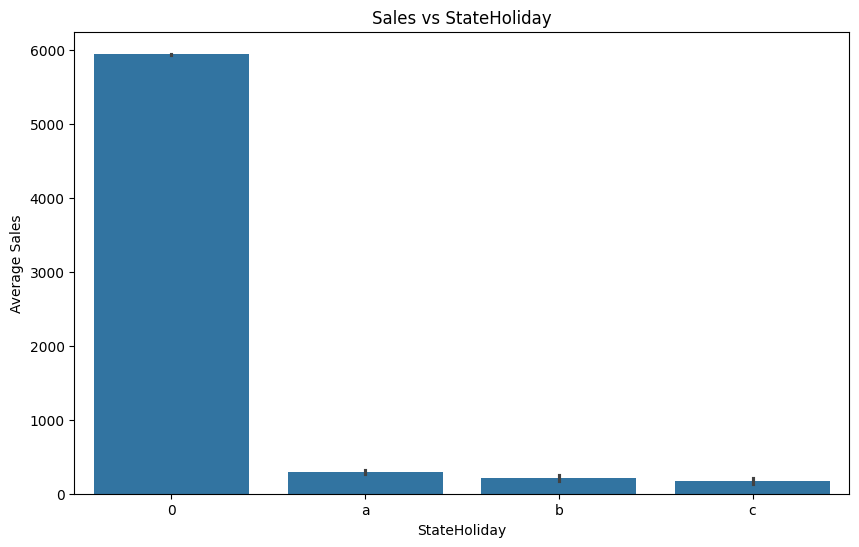

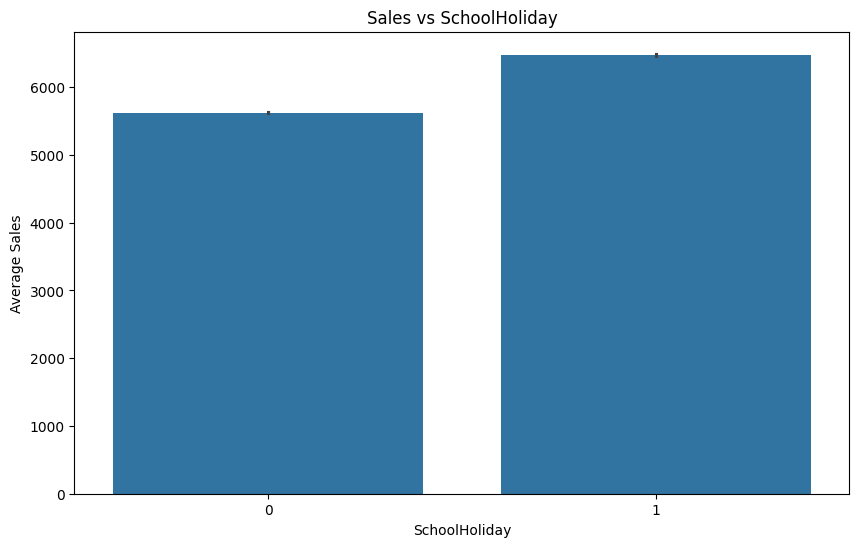

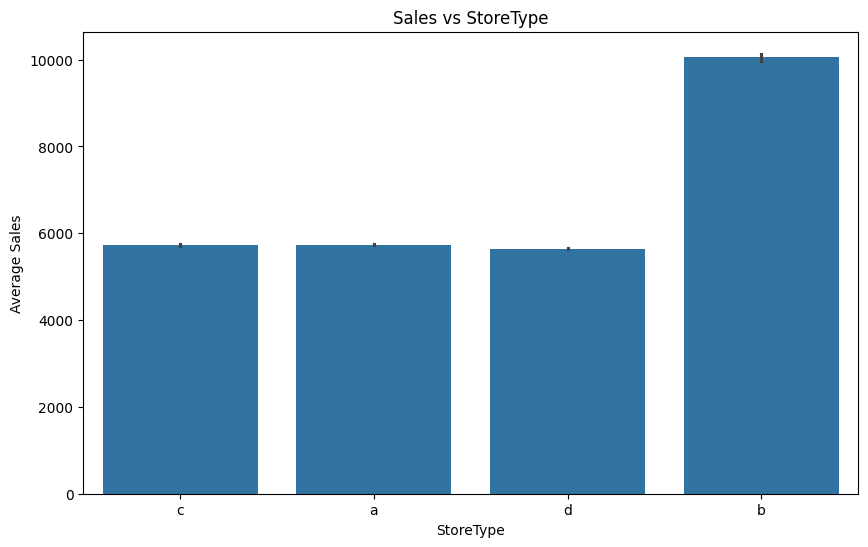

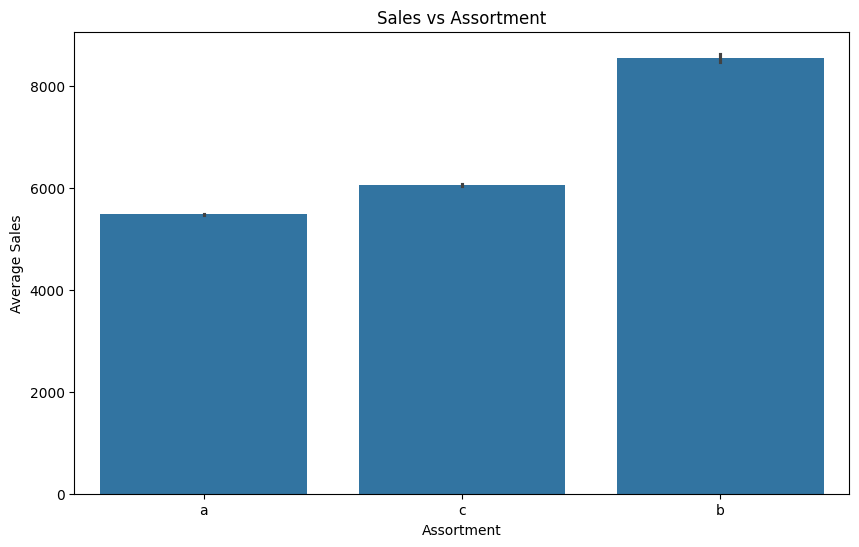

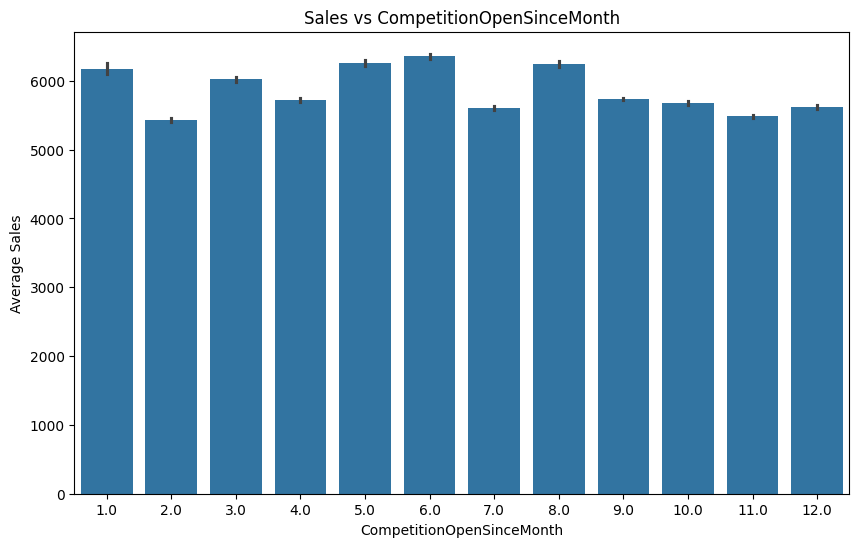

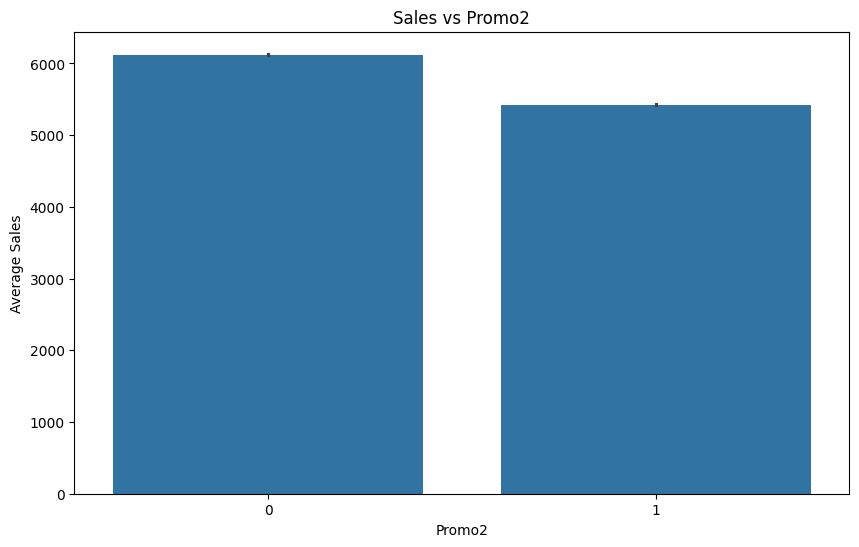

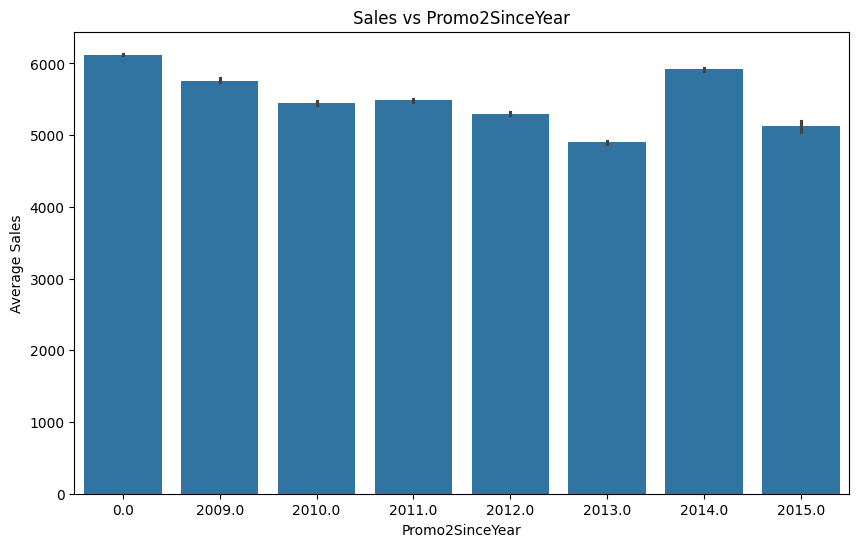

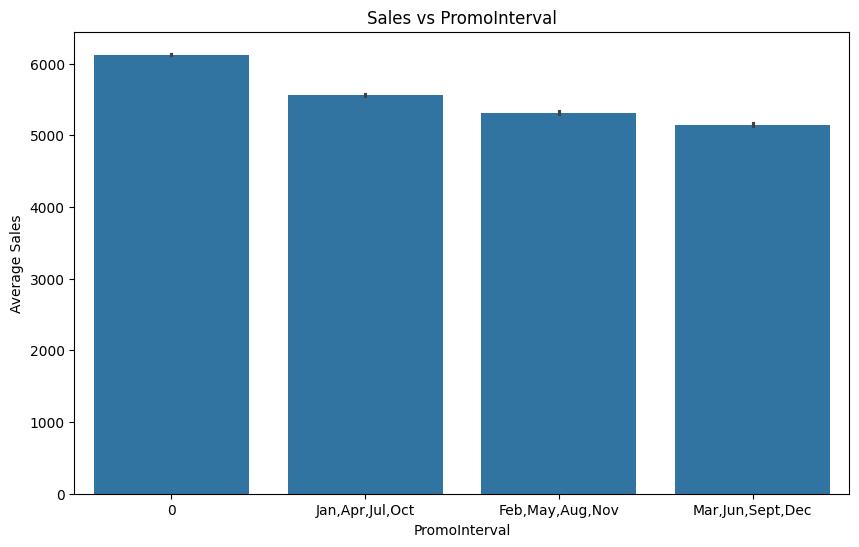

In [44]:
#code for barplots of the categorical variables against sales
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']

for value in categorical_variables:
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=df[value], y=df['Sales']) 
    ax.set_xlabel(value) 
    ax.set_ylabel('Average Sales')  
    plt.title(f'Sales vs {value}')  
    plt.show()

<Axes: xlabel='Promo2', ylabel='count'>

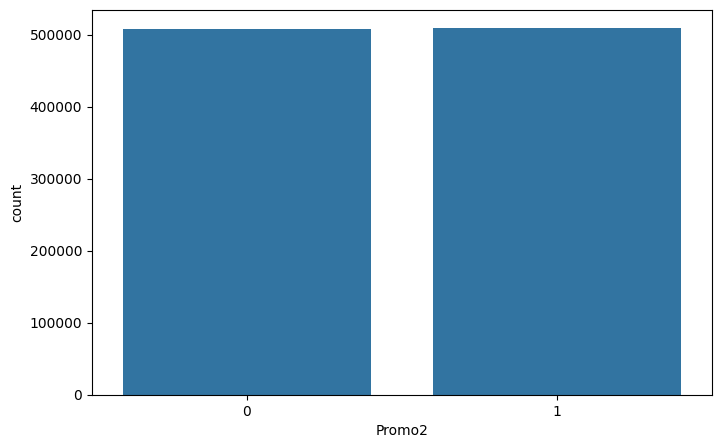

In [45]:
# counting the number of stores participating and not participating in Promo2
sns.countplot(x=df['Promo2'])

In [49]:
promo2_counts = df['Promo2'].value_counts()
not_participating_count = promo2_counts[0]
print(f"Number of stores not participating in Promo2: {not_participating_count}")

Number of stores not participating in Promo2: 509178


In [110]:
promo2_counts = df['Promo2'].value_counts()
participating_count = promo2_counts[1]
print(f"Number of stores participating in Promo2: {participating_count}")

Number of stores participating in Promo2: 509178


<Axes: xlabel='Open', ylabel='Sales'>

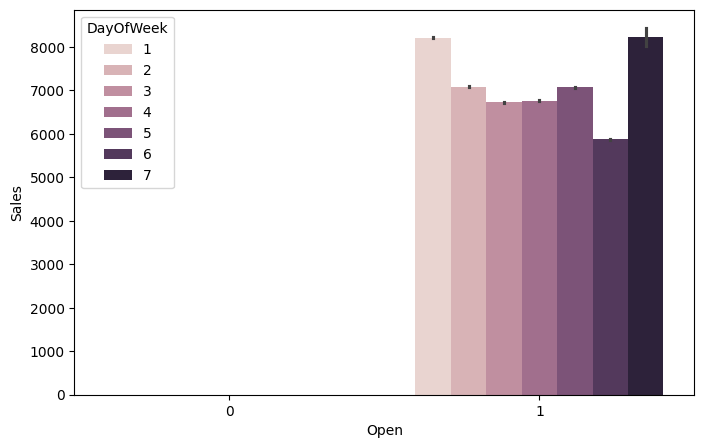

In [47]:
# Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

<Axes: xlabel='Open', ylabel='count'>

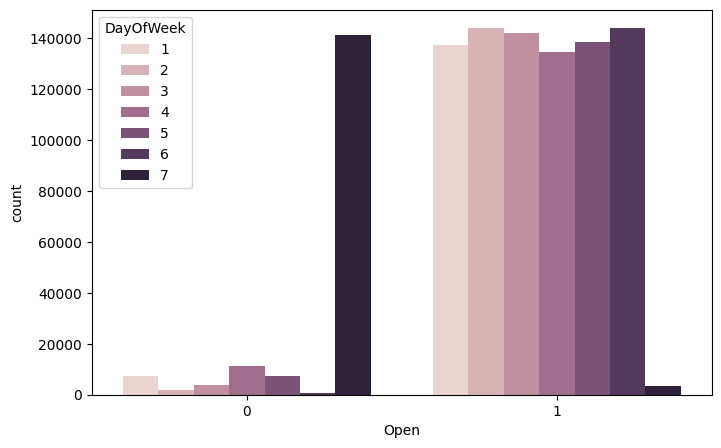

In [46]:
# counts of stores closed for refurbishment and suggests that most stores are closed on sunday
sns.countplot(x=df["Open"], hue=df["DayOfWeek"])

<Axes: xlabel='StoreType', ylabel='Sales'>

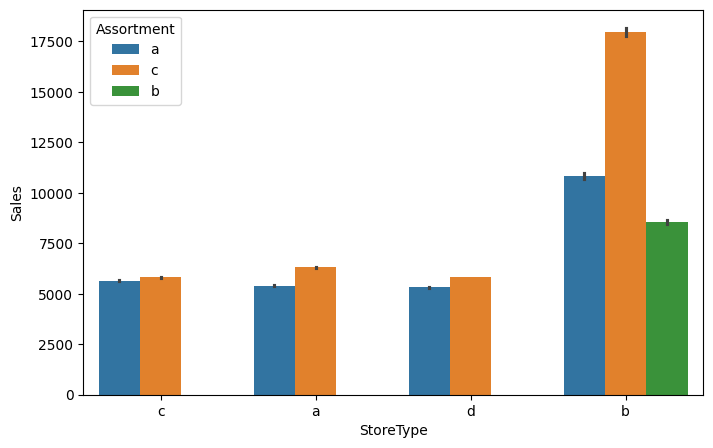

In [54]:
# relationship between store type, assortment levels and sales
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

In [57]:
store_type = df.groupby("StoreType")[["Sales", "Customers"]].sum().reset_index()
store_type.sort_values(["Sales", "Customers"], ascending=False, inplace=True)
store_type

,StoreType,Sales,Customers
0,a,3165334859,363541434
3,d,1765392943,156904995
2,c,783221426,92129705
1,b,159231395,31465621


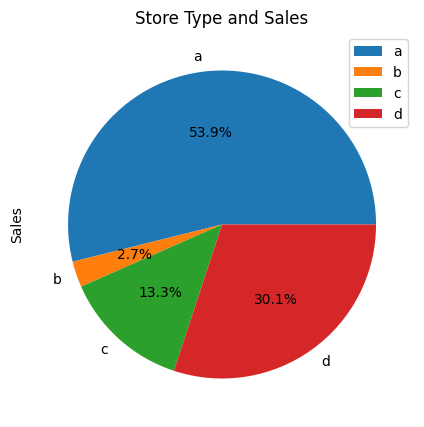

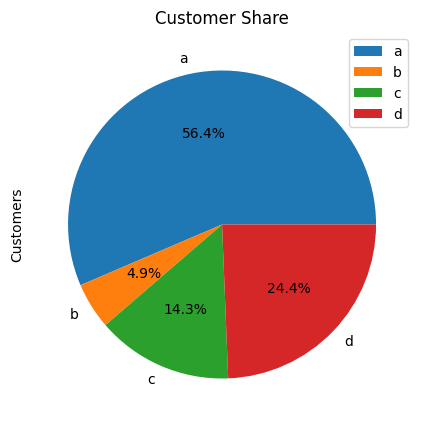

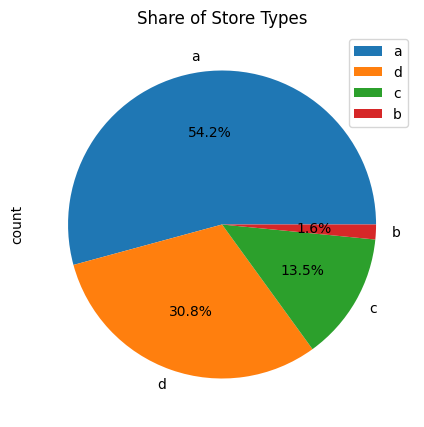

In [61]:
# store type and it's influence on sales
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%')
plt.show()
# customers and store type
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%')
plt.show()
# store types in all of the dataset
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%')
plt.show()

In [62]:
years

array([2015, 2014, 2013], dtype=int32)

In [63]:
#sales over the years
sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]

In [64]:
# monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()

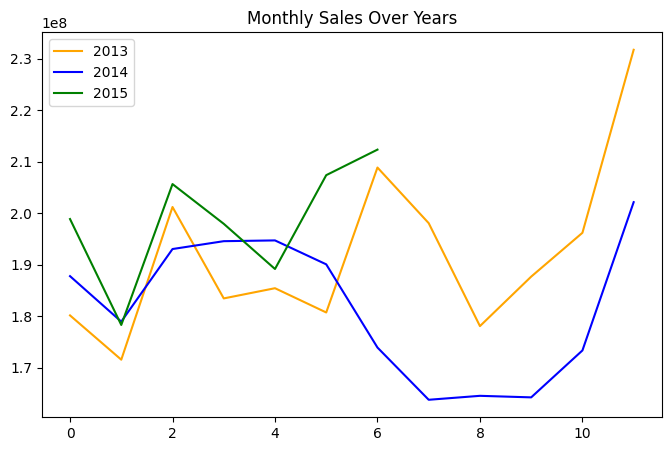

In [65]:
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

<Axes: xlabel='Customers', ylabel='Sales'>

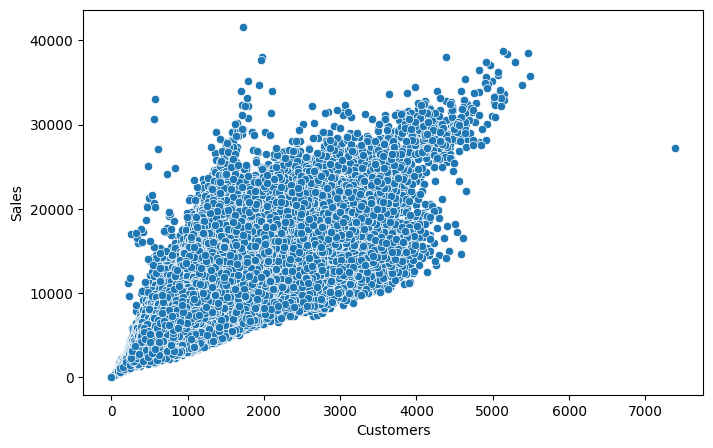

In [66]:
# check relationship between customers and sales
sns.scatterplot(x=df['Customers'], y=df['Sales'])

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

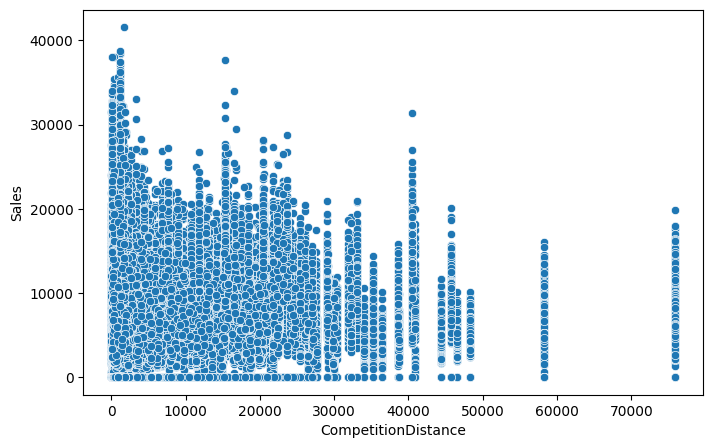

In [67]:
# check relationship between competition distance and sales
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

<Axes: ylabel='Density'>

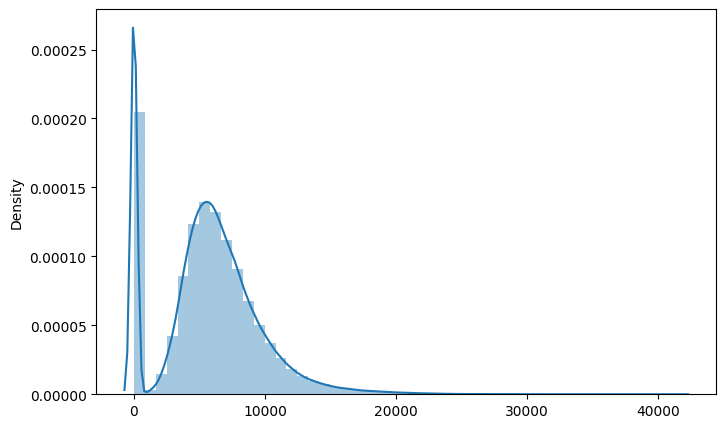

In [68]:
sns.distplot(x=df['Sales'])

The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.

Correlation Matrix

In [71]:
#we need only meaningful numeric columns here, so we dropped the unnecessary one's
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)


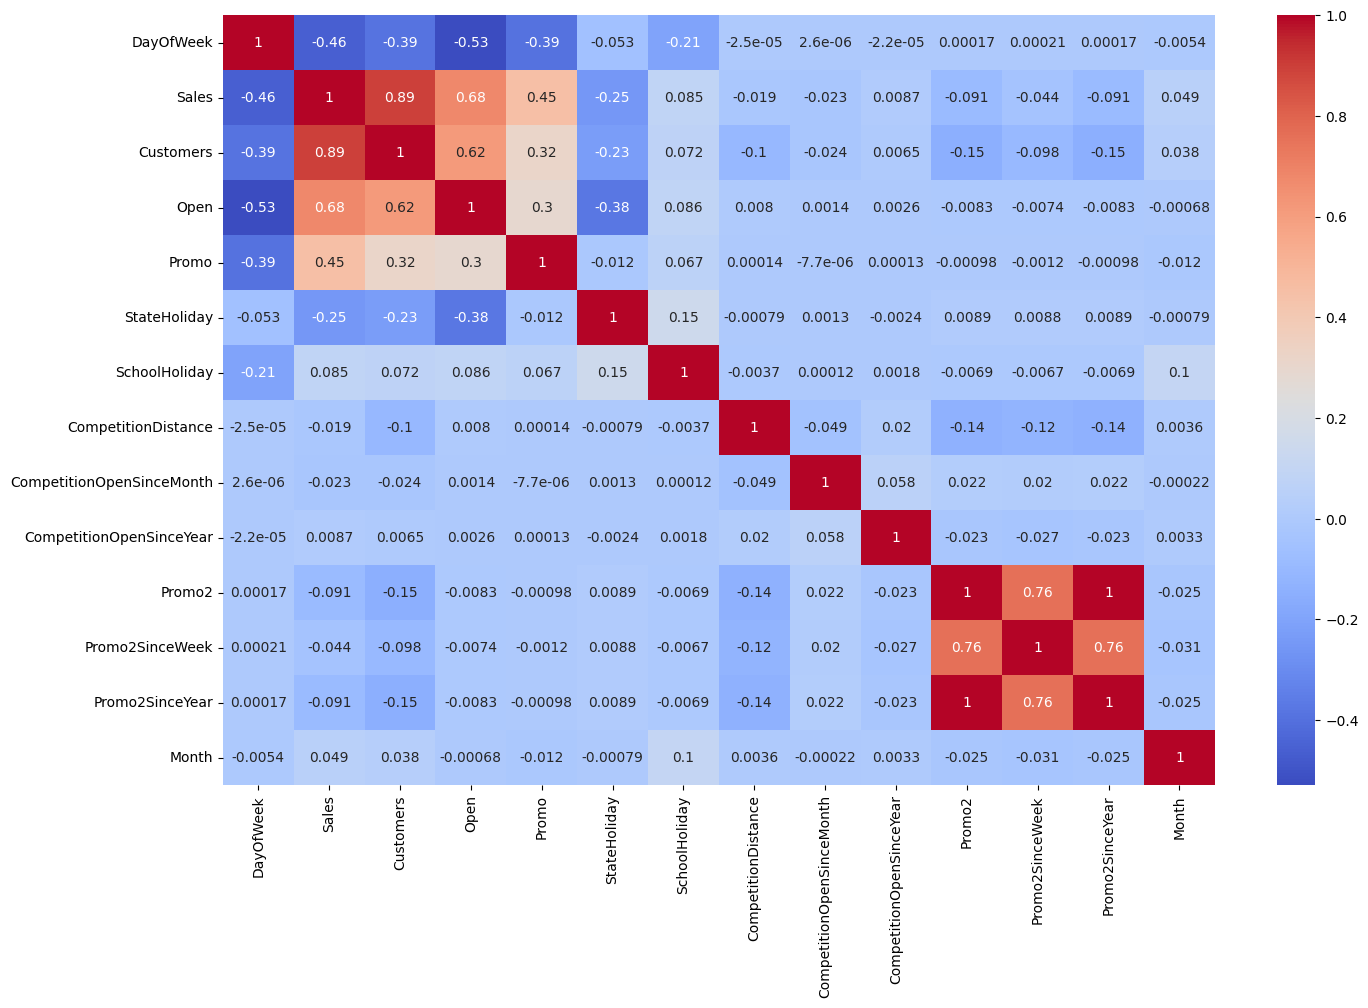

In [73]:
numeric_df = corr_df.select_dtypes(include=[np.number])
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=True)
plt.show()

EDA Conclusions and Hypotheses Validation:

1. There were more sales on Monday, probably because shops generally remain closed on Sundays.
2. Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.
3. The bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.
4. It could be seen from the bar plot that the Promo leads to more sales.
5. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.
6. Sales rise up by the end of the year before the holidays.
7. CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot.
8. The bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.
9. Normally all stores, with few exceptions, are closed on state holidays. So lowest of Sales were seen on state holidays especially on Christmas.
10. With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.
11. Increase in sales have been observed when there is a school holiday as compared to regular days. 
12. It can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.

Data Manipulation and Feature Selection

Feature Engineering

In [76]:
# no of observations for closed stores with 0 sales
(df[df.Open == 0]).shape

(172817, 22)

In [77]:
# It is mentioned in the problem statement that some stores were temporarily closed for refurbishment and hence did not generate any sales. Thus, removing the irrelevant part
df1 = df[df.Open != 0]
df1.drop('Open', axis=1, inplace=True)

In [78]:
df1.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,0,1,c,a,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212


<Axes: ylabel='Density'>

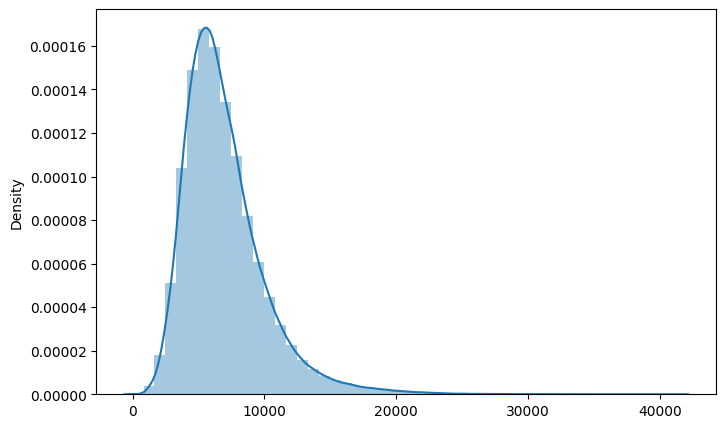

In [79]:
# distribution plot of Sales, as expected positively skewed
sns.distplot(x=df1['Sales'])

In [80]:
# Sales data often has a right-skewed distribution, meaning there are a few very large values that can dominate the analysis. Applying a log transformation can reduce this skewness, making the data more normally distributed.
df1['Sales'] = np.log(df1['Sales'])

In [81]:
df1.dropna(inplace=True)

In [82]:
df1.drop(df1[df1['Sales'] == float("-inf")].index,inplace=True)

<Axes: ylabel='Density'>

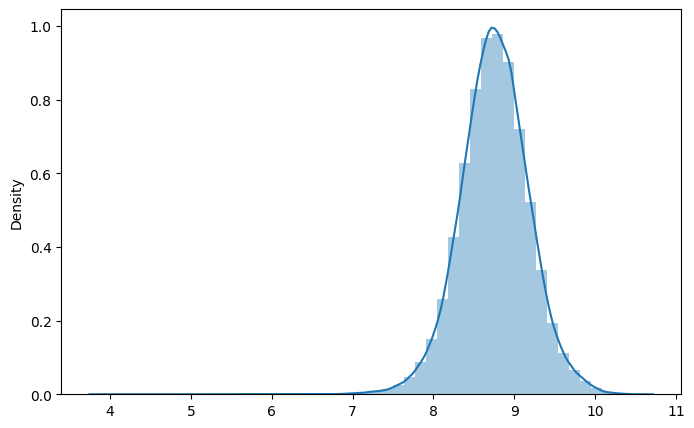

In [83]:
sns.distplot(x=df1['Sales'])

In [84]:
df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [85]:
# combining competition open since month and year into total months
df1['CompetitionOpen'] = (df1['Year'] - df1['CompetitionOpenSinceYear'])*12 + (df1['Month'] - df1['CompetitionOpenSinceMonth'])
# correcting the neg values
df1['CompetitionOpen'] = df1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
# dropping both the columns
df1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [86]:
# combining promo2 to total months
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear'])*12 + (df1['WeekOfYear'] - df1['Promo2SinceWeek'])*0.230137

df1['Promo2Open'] = df1['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df1['Promo2']
#creating a feature for promo interval and checking if promo2 was running in the sale month
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = df['PromoInterval'].split(',')
    if df['Month'] and month_dict[df['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

df1['Promo2running'] = df1.apply(promo2running,axis=1)*df1['Promo2']
df1.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [87]:
df1.set_index(['Date','Store'],inplace=True)
df1.sort_index(inplace=True)

In [88]:
df1.head(1)

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-01,85,2,8.34759,619,0,1,1,b,a,1870.0,0,2013,1,1,1,15.0,0.0,0


Outlier Detection

Total number of Outliers present in the Sales column are 1559.


[Text(0.5, 1.0, 'Outliers Distribution')]

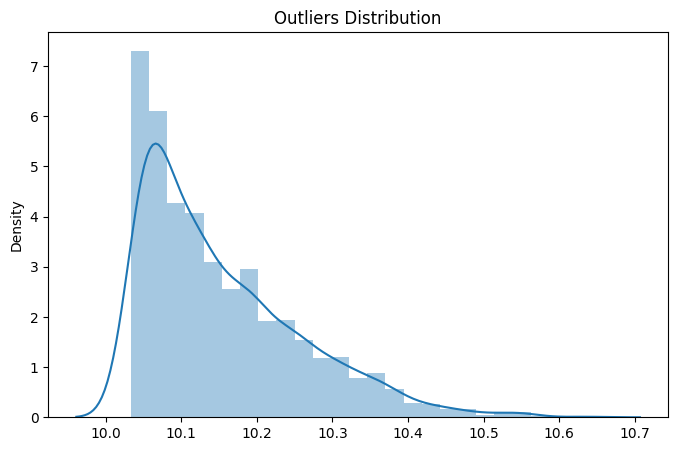

In [89]:
mean_sales = np.mean(df1['Sales'])
sd_sales = np.std(df1['Sales'])
threshold = 3
outliers = []
for value in df1['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
sns.distplot(x=outliers).set(title='Outliers Distribution')

The data points with sales value higher than 10.2 are very low and hence they an be considered as outliers. The percentage of outliers in our dataset:

In [90]:
sales_outliers = df1.loc[df1['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(df1))*100
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 28000 are 0.050809036191667316


In [91]:
sales_outliers

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-01-07,817,1,10.381676,4065,1,0,0,a,a,140.0,0,2013,1,2,7,82.0,0.0,0
2013-01-08,817,2,10.241744,3862,1,0,0,a,a,140.0,0,2013,1,2,8,82.0,0.0,0
2013-01-21,817,1,10.330942,3900,1,0,0,a,a,140.0,0,2013,1,4,21,82.0,0.0,0
2013-01-22,817,2,10.210605,7388,1,0,0,a,a,140.0,0,2013,1,4,22,82.0,0.0,0
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,2013,2,5,34,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-07-13,1114,1,10.245516,3592,1,0,0,a,c,870.0,0,2015,7,29,194,22.0,0.0,0
2015-07-19,262,7,10.362967,4691,0,0,0,b,a,1180.0,0,2015,7,29,200,26.0,0.0,0
2015-07-26,262,7,10.390440,4783,0,0,0,b,a,1180.0,0,2015,7,30,207,26.0,0.0,0


Observation:

1. If we look at DayOfWeek for Store 262. It's sunday and it has high sales and it's of the store type B.
2. All other data points had promotion going on and they had a high number of Customers as well indicating no absurd behavior.
3. It can be well established that the outliers are showing this behavior for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behavior seems fair.

In [92]:
# check which stores were open on Sunday in the outliers dataframe
sales_outliers.loc[sales_outliers['DayOfWeek']==7]

,,DayOfWeek,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,Month,WeekOfYear,DayOfYear,CompetitionOpen,Promo2Open,Promo2running
Date,Store,,,,,,,,,,,,,,,,,
2013-02-03,262,7,10.272323,4144,0,0,0,b,a,1180.0,0,2013,2,5,34,0.0,0.0,0
2013-02-10,262,7,10.209280,4133,0,0,0,b,a,1180.0,0,2013,2,6,41,0.0,0.0,0
2013-03-03,262,7,10.280210,4314,0,0,0,b,a,1180.0,0,2013,3,9,62,0.0,0.0,0
2013-03-10,262,7,10.207068,4130,0,0,0,b,a,1180.0,0,2013,3,10,69,0.0,0.0,0
2013-03-17,262,7,10.247822,4204,0,0,0,b,a,1180.0,0,2013,3,11,76,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-28,262,7,10.268721,4450,0,0,0,b,a,1180.0,0,2015,6,26,179,25.0,0.0,0
2015-07-05,262,7,10.317417,4762,0,0,0,b,a,1180.0,0,2015,7,27,186,26.0,0.0,0
2015-07-12,262,7,10.381924,4623,0,0,0,b,a,1180.0,0,2015,7,28,193,26.0,0.0,0


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

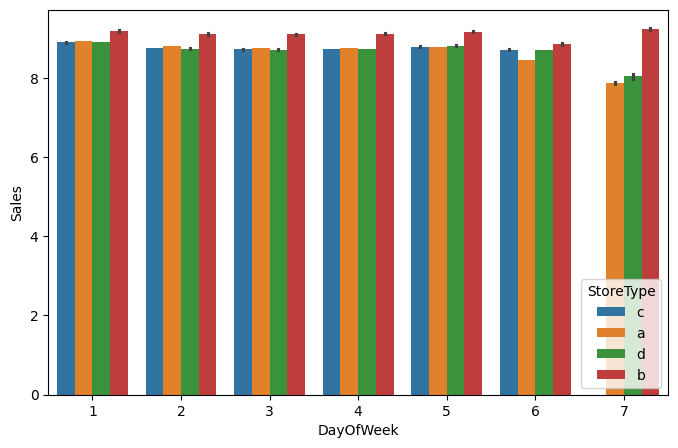

In [93]:
sns.barplot(x=df1['DayOfWeek'],y=df1["Sales"],hue=df1['StoreType'])

In [94]:
df1.loc[(df1['DayOfWeek']==7) & (df1['StoreType']=='b')]

DayOfWeek      Sales  Customers  Promo  StateHoliday  \
Date       Store                                                         
2013-01-06 85             7   9.259987       1509      0             0   
           259            7   8.977904       1686      0             0   
           262            7  10.053630       3479      0             0   
           274            7   8.243283        932      0             0   
           335            7   8.883640       1310      0             0   
...                     ...        ...        ...    ...           ...   
2015-07-26 733            7   9.691037       3352      0             0   
           769            7   9.312446       2783      0             0   
           948            7   9.395990       2346      0             0   
           1081           7   8.659734        875      0             0   
           1097           7   9.496045       2710      0             0   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-06 85                 0         b          a               1870.0   
           259                1         b          b                210.0   
           262                0         b          a               1180.0   
           274                1         b          b               3640.0   
           335                0         b          a                 90.0   
...                         ...       ...        ...                  ...   
2015-07-26 733                0         b          b                860.0   
           769                0         b          b                840.0   
           948                0         b          b               1430.0   
           1081               0         b          a                400.0   
           1097               0         b          b                720.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-06 85          0  2013      1           1          6             15.0   
           259         0  2013      1           1          6              0.0   
           262         0  2013      1           1          6              0.0   
           274         1  2013      1           1          6              0.0   
           335         1  2013      1           1          6              0.0   
...                  ...   ...    ...         ...        ...              ...   
2015-07-26 733         0  2015      7          30        207            189.0   
           769         1  2015      7          30        207             22.0   
           948         0  2015      7          30        207             22.0   
           1081        0  2015      7          30        207            112.0   
           1097        0  2015      7          30        207            160.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-06 85       0.000000              0  
           259      0.000000              0  
           262      0.000000              0  
           274      0.000000              1  
           335      0.000000              1  
...                      ...            ...  
2015-07-26 733      0.000000              0  
           769     31.857534              1  
           948      0.000000              0  
           1081     0.000000              0  
           1097     0.000000              0  

[2216 rows x 17 columns]

Observation:

1. This suggests that store type b had high sales almost all week. No store of type C was open on Sunday.
2. Being open 24*7 along with all kinds of assortments available is probably the reason why it had higher average sales than any other store type.

In [95]:
df1.shape

(844338, 17)

Outlier Treatment:

It can be well established that the outliers are showing this behaviour for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behaviour seems fair and important from the business point of view.